In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_excel(".\dataset.xlsx")
df.dropna(axis=0)


,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667
3,android-permission-handler-master,1,1,1,6,0.0,2.1,0.083333,1.000000,4.250000,18.757143,3.385714,3.019608,2.333333,8.833333,3.314286,1.666667
4,Android-WhatsApp-master,0,6,0,253,3.4,4.2,0.036145,2.843373,2.120482,46.416898,16.549861,7.336918,5.704301,10.913580,11.076696,0.903614
5,android-youtubeExtractor-master,4,18,7,100,3.8,3.1,0.200000,1.880000,6.720000,43.434783,2.920290,3.908163,5.020408,18.826090,8.260870,1.840000
6,androidtv-sample-inputs-master,15,3,0,155,3.0,1.0,0.241935,2.491935,8.120968,36.534765,11.452965,3.972868,4.281654,23.250000,5.811861,1.580645
7,BirthdayBuddy-master,1,0,0,69,1.0,0.2,0.000000,0.000000,0.000000,52.708333,1.708333,0.000000,0.000000,0.000000,0.000000,0.000000
8,dex2jar,34,306,43,2000,10.1,1.7,0.500824,3.654036,7.975288,41.952099,5.579882,5.454865,4.075811,17.238180,9.152676,1.507414
9,epubator-master,0,12,8,134,0.0,3.0,0.255319,2.180851,6.063830,19.005579,2.112971,2.749027,3.050584,16.319150,3.418410,1.127660


In [3]:
df.head(3) #First 3 samples of the our dataset:

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


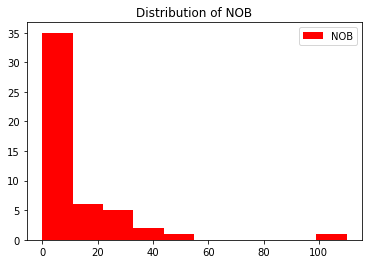

In [4]:
#show the distribution of 3 metrics
internal=["NOC","CBO","RFC","LOC","CLOC","FanIn","FanOut","LCOM","WMC","DIT"]
external=["NOB","V","SH","CS"]
td=["CDR","TD"]
def plotHist(columnName,colorName):
    plt.hist(df[columnName],label=columnName,color=colorName)
    plt.title("Distribution of {}".format(columnName))
    plt.legend()
plotHist("NOB", "red")

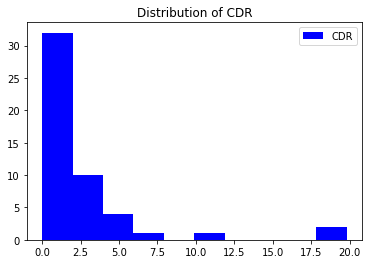

In [5]:
plotHist("CDR","blue")


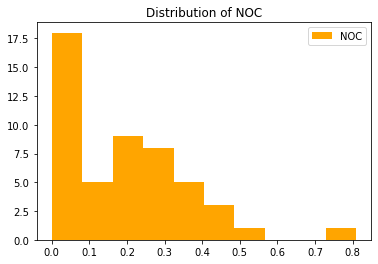

In [6]:
plotHist("NOC","orange")

In [7]:
#Min max scaler for all data

columns=[]
for i in df.columns:
    columns.append(i)
columns=columns[1:]

for j in columns:
    x=[]
    for i in df.index:
        x.append(float(float(df[j][i])-float(min(df[j])))/(float((max(df[j]))-float(min(df[j])))))
    df[j]=x
                                                                
minmaxdf=df
df

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
1,AndroidAsyncHTTP-master,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
2,android-pdf-viewer-master,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504
3,android-permission-handler-master,0.009091,0.003268,0.023256,0.0030,0.000000,0.172131,0.102941,0.273670,0.177037,0.104300,0.204577,0.411564,0.362383,0.200758,0.299212,0.765504
4,Android-WhatsApp-master,0.000000,0.019608,0.000000,0.1265,0.171717,0.344262,0.044649,0.778146,0.088330,0.834019,1.000000,1.000000,0.885917,0.248036,1.000000,0.415032
5,android-youtubeExtractor-master,0.036364,0.058824,0.162791,0.0500,0.191919,0.254098,0.247059,0.514500,0.279926,0.755345,0.176454,0.532671,0.779704,0.427866,0.745788,0.845116
6,androidtv-sample-inputs-master,0.136364,0.009804,0.000000,0.0775,0.151515,0.081967,0.298861,0.681968,0.338284,0.573309,0.692028,0.541490,0.664970,0.528409,0.524693,0.725994
7,BirthdayBuddy-master,0.009091,0.000000,0.000000,0.0345,0.050505,0.016393,0.000000,0.000000,0.000000,1.000000,0.103223,0.000000,0.000000,0.000000,0.000000,0.000000
8,dex2jar,0.309091,1.000000,1.000000,1.0000,0.510101,0.139344,0.618665,1.000000,0.332216,0.716229,0.337156,0.743482,0.633001,0.391777,0.826300,0.692359
9,epubator-master,0.000000,0.039216,0.186047,0.0670,0.000000,0.245902,0.315394,0.596833,0.252593,0.110854,0.127673,0.374684,0.473776,0.370890,0.308613,0.517937


# Part1 (Statistical Correlation Analysis)

In [8]:
#Show the correlation matrix of all metrics

x=df.corr(method='spearman', min_periods=1)
x

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [9]:
df.drop(['Name'], 1, inplace=True)

In [10]:
#P values of Spearman Correlation Table

import scipy.stats
corr, p_value=scipy.stats.spearmanr(df)
np.set_printoptions(suppress=True)

p_value=np.around(p_value,4)
pd.DataFrame(p_value, index=["NOB","V","SH","CS","CDR","TD","NOC","CBO","RFC","LOC","CLOC","FanIn","FanOut","LCOM","WMC","DIT"],columns=["NOB","V","SH","CS","CDR","TD","NOC","CBO","RFC","LOC","CLOC","FanIn","FanOut","LCOM","WMC","DIT"])

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,0.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
V,0.0000,0.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
SH,0.0000,0.0000,0.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
CS,0.0000,0.0000,0.0000,0.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
CDR,0.0076,0.0486,0.0058,0.0000,0.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
TD,0.3558,0.0364,0.8548,0.1756,0.9264,0.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
NOC,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,0.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
CBO,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,0.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
RFC,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,0.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
LOC,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,0.0000,0.3807,0.0000,0.0000,0.6515,0.0000,0.2082


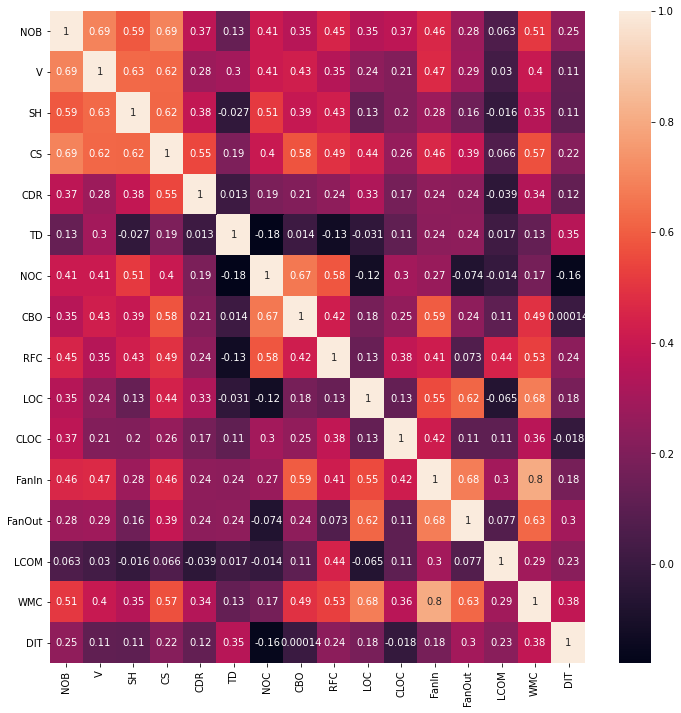

In [11]:
#If you want to see heatmap of the correlation matrix, you can launch code below:

heat_map= sns.heatmap(x, annot=True)
figure = plt.gcf()
figure.set_size_inches(12,12)
plt.show()

In [12]:
#Correlation between External Metrics & TD
external=["NOB","V","SH","CS"]
td=["CDR","TD"]
combine=external+td
df[combine].corr(method="spearman")


,NOB,V,SH,CS,CDR,TD
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [13]:
#Correlation between Internal Metrics & TD
internal=["NOC","CBO","RFC","LOC","CLOC","FanIn","FanOut","LCOM","WMC","DIT"]
combine2=internal+td
df[combine2].corr(method="spearman")

,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT,CDR,TD
NOC,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788,0.192707,-0.179659
CBO,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144,0.212007,0.013652
RFC,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368,0.240992,-0.126364
LOC,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072,0.328527,-0.031098
CLOC,0.297347,0.250408,0.381636,0.126681,1.000000,0.416789,0.109636,0.107619,0.355080,-0.017867,0.171773,0.114297
FanIn,0.268289,0.594578,0.414878,0.554326,0.416789,1.000000,0.679297,0.296355,0.802910,0.179395,0.243709,0.239077
FanOut,-0.074350,0.240953,0.072564,0.618676,0.109636,0.679297,1.000000,0.076982,0.626327,0.295389,0.237237,0.240135
LCOM,-0.013518,0.109694,0.444076,-0.065455,0.107619,0.296355,0.076982,1.000000,0.291312,0.229251,-0.038683,0.017159
WMC,0.173468,0.492616,0.529367,0.678224,0.355080,0.802910,0.626327,0.291312,1.000000,0.381028,0.343628,0.127638
DIT,-0.163788,0.000144,0.237368,0.181072,-0.017867,0.179395,0.295389,0.229251,0.381028,1.000000,0.123330,0.352010


# Part2 (ML Modelling)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid
from sklearn import metrics

random_state_fixed=53

#This function plots graphs to improve visual confirmation
def plotGraph(y_test,y_pred,regressorName):
  #Plot the Scatter Graph to see results better
    plt.scatter(y_test,regressorName.predict(X_test),color="blue",label="Predicted values")
    plt.scatter(y_test,y_test,color="red",label="Original values")
    plt.legend()
    plt.show()
    
#Linear Regressor is one of the best choice for the data that is correlated linearly:

def linearRegression(X_train,y_train,X_test,y_test):
  # Create the regressor: reg_all
    reg_all=LinearRegression()
    reg_all.fit(X_train,y_train)
    y_pred=reg_all.predict(X_test)
    print("R-Squared Value:",metrics.r2_score(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    plotGraph(y_test,y_pred,reg_all)
#SVR is also one of the most common regressor that used for regression predictions

def svrRegression(X_train,y_train,X_test,y_test):
    svr=SVR()
    svr.fit(X_train,y_train)
    y_pred=svr.predict(X_test)
    print("R-Squared Value:",metrics.r2_score(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    plotGraph(y_test,y_pred,svr)

def decisionTreeRegression(X_train,y_train,X_test,y_test):
    regressor = DecisionTreeRegressor(random_state=random_state_fixed)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    print("R-Squared Value:",metrics.r2_score(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    plotGraph(y_test,y_pred,regressor)
    
def randomDecTreeRegression(X_train,y_train,X_test,y_test):
    rand = RandomForestRegressor( random_state = random_state_fixed)
    rand.fit(X_train,y_train)
    y_pred = rand.predict(X_test)
    print("R-Squared Value:",metrics.r2_score(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    plotGraph(y_test,y_pred,rand)

#Multi-layer Perceptron regressor: 'This model optimizes the squared-loss using LBFGS or stochastic gradient descent.'
def mlpRegressor(X_train,y_train,X_test,y_test):
    regr = MLPRegressor(random_state=random_state_fixed).fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    print("R-Squared Value:",metrics.r2_score(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    plotGraph(y_test,y_pred,regr)


In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [15]:
#split data into train and test data
X = df.iloc[:,6:]
y = df.iloc[:,5]
 
Xcdr = df.iloc[:,6:]
ycdr = df.iloc[:,4]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 53)
Xcdr_train, Xcdr_test, ycdr_train, ycdr_test = train_test_split(Xcdr, ycdr, test_size = 0.3,random_state = 53)

TD Graph
R-Squared Value: -0.17296753046920688
Root Mean Squared Error: 0.26506407767604284


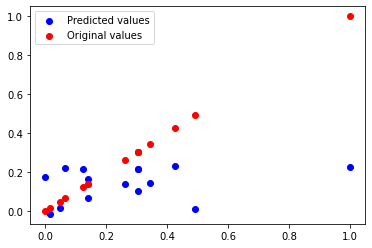

In [16]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
print("TD Graph")
linearRegression(X_train,y_train,X_test,y_test)


CDR Graph
R-Squared Value: -0.25353936900603147
Root Mean Squared Error: 0.2822820349754406


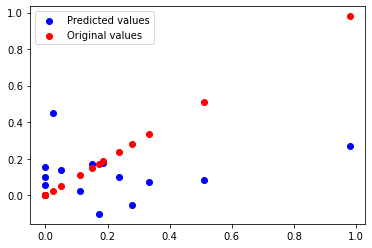

In [17]:
print("CDR Graph")
linearRegression(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)


Rbf-TD Graph
R-Squared Value: -0.0765866953166634
Root Mean Squared Error: 0.2539407417364148


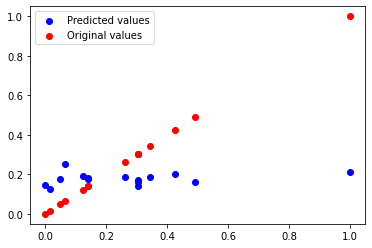

In [18]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
svr=SVR(kernel = 'rbf')
print("Rbf-TD Graph")
svrRegression(X_train,y_train,X_test,y_test)

Rbf-CDR Graph
R-Squared Value: -0.16455641994479642
Root Mean Squared Error: 0.27207868349808145


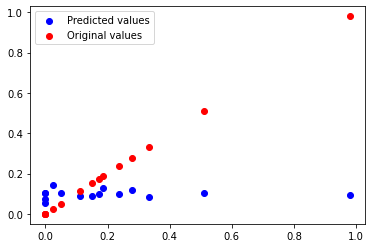

In [19]:
print("Rbf-CDR Graph")
svr=SVR(kernel = 'rbf')
svrRegression(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)


Linear-TD Graph
R-Squared Value: -0.0765866953166634
Root Mean Squared Error: 0.2539407417364148


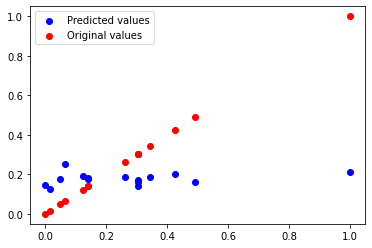

In [20]:
print("Linear-TD Graph")
svr=SVR(kernel = 'linear')
svrRegression(X_train,y_train,X_test,y_test)

Linear-CDR Graph
R-Squared Value: -0.16455641994479642
Root Mean Squared Error: 0.27207868349808145


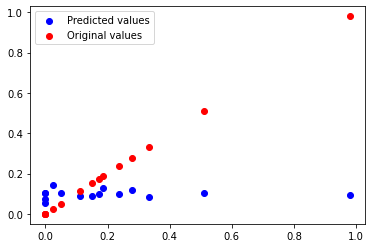

In [21]:
print("Linear-CDR Graph")
svr=SVR(kernel = 'linear')
svrRegression(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)


TD Graph
R-Squared Value: -0.5112615531870346
Root Mean Squared Error: 0.30086917595682483


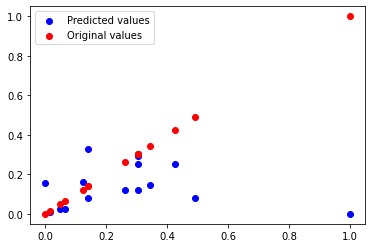

In [22]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
print("TD Graph")
decisionTreeRegression(X_train,y_train,X_test,y_test)

CDR Graph
R-Squared Value: -0.12150757783825572
Root Mean Squared Error: 0.26700251782083956


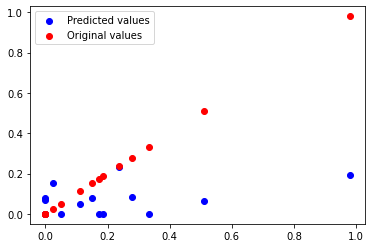

In [23]:
print("CDR Graph")
decisionTreeRegression(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)

TD Graph
R-Squared Value: -0.18854060689751417
Root Mean Squared Error: 0.2668178569544247


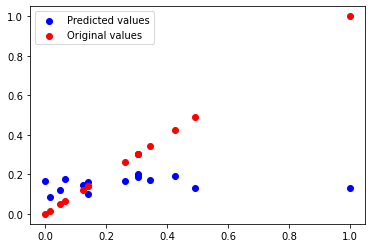

In [24]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
print("TD Graph")
randomDecTreeRegression(X_train,y_train,X_test,y_test)

CDR Graph
R-Squared Value: -0.05101676969007363
Root Mean Squared Error: 0.25847531504491733


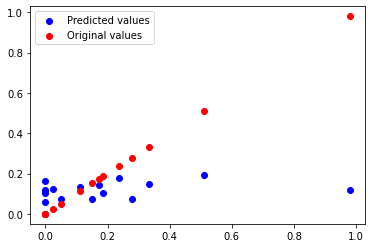

In [25]:
print("CDR Graph")
randomDecTreeRegression(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)

TD Graph
R-Squared Value: -0.4871772319255996
Root Mean Squared Error: 0.2984621365383263


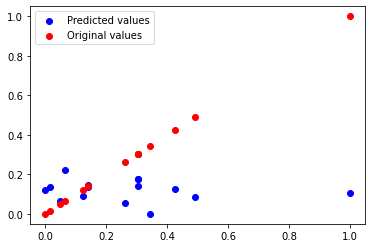

In [26]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
print("TD Graph")
mlpRegressor(X_train,y_train,X_test,y_test)

CDR Graph
R-Squared Value: -0.22435327148884188
Root Mean Squared Error: 0.2789765014141509


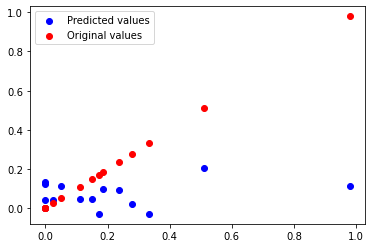

In [27]:
print("CDR Graph")
mlpRegressor(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [28]:
#split data into train and test data
X = df.iloc[:,:4]
y = df.iloc[:,5]
 
Xcdr = df.iloc[:,:4]
ycdr = df.iloc[:,4]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 53)
Xcdr_train, Xcdr_test, ycdr_train, ycdr_test = train_test_split(Xcdr, ycdr, test_size = 0.3,random_state = 53)

TD Graph
R-Squared Value: -0.4331628534217624
Root Mean Squared Error: 0.2929919249634493


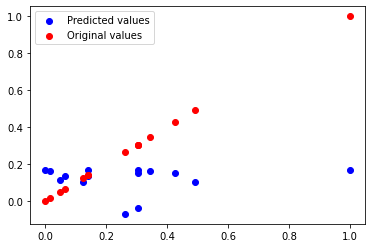

In [29]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
print("TD Graph")
linearRegression(X_train,y_train,X_test,y_test)

CDR Graph
R-Squared Value: -0.29877407933861844
Root Mean Squared Error: 0.2873300555429503


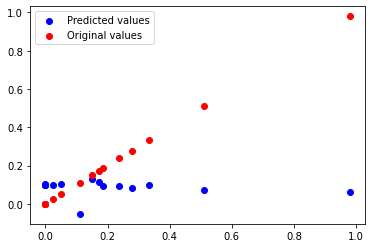

In [30]:
print("CDR Graph")
linearRegression(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)

Rbf-TD Graph
R-Squared Value: -0.45281551449179935
Root Mean Squared Error: 0.2949939533353097


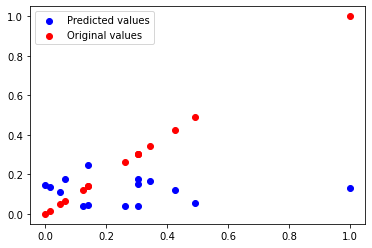

In [31]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
svr=SVR(kernel = 'rbf')
print("Rbf-TD Graph")
svrRegression(X_train,y_train,X_test,y_test)

Rbf-CDR Graph
R-Squared Value: -0.05742000726843277
Root Mean Squared Error: 0.2592614897703499


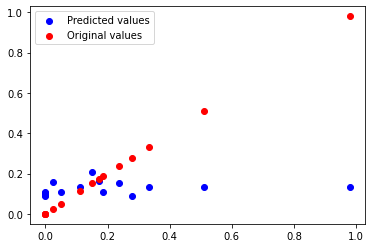

In [32]:
print("Rbf-CDR Graph")
svr=SVR(kernel = 'rbf')
svrRegression(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)

Linear-TD Graph
R-Squared Value: -0.45281551449179935
Root Mean Squared Error: 0.2949939533353097


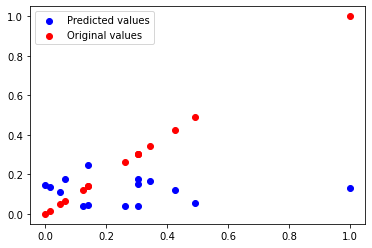

In [33]:
print("Linear-TD Graph")
svr=SVR(kernel = 'linear')
svrRegression(X_train,y_train,X_test,y_test)

Linear-CDR Graph
R-Squared Value: -0.05742000726843277
Root Mean Squared Error: 0.2592614897703499


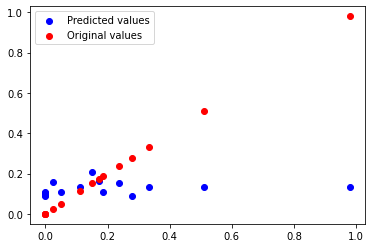

In [34]:
print("Linear-CDR Graph")
svr=SVR(kernel = 'linear')
svrRegression(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)

TD Graph
R-Squared Value: -0.7371656181142008
Root Mean Squared Error: 0.32257335573307827


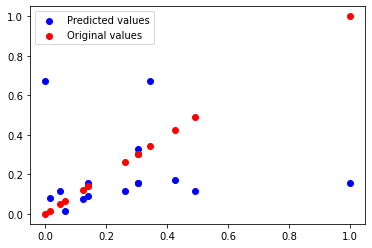

In [35]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
print("TD Graph")
decisionTreeRegression(X_train,y_train,X_test,y_test)

CDR Graph
R-Squared Value: -0.49827719657436775
Root Mean Squared Error: 0.3086102422213462


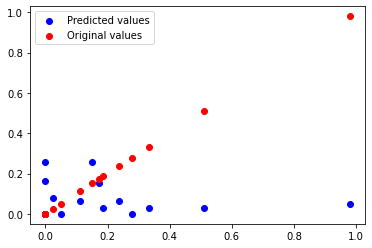

In [36]:
print("CDR Graph")
decisionTreeRegression(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)

TD Graph
R-Squared Value: -0.12283691062544255
Root Mean Squared Error: 0.25933803739256533


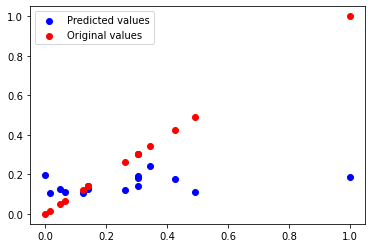

In [37]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
print("TD Graph")
randomDecTreeRegression(X_train,y_train,X_test,y_test)

CDR Graph
R-Squared Value: -0.26333860652667807
Root Mean Squared Error: 0.28338322249338543


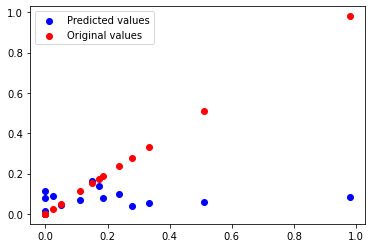

In [38]:
print("CDR Graph")
randomDecTreeRegression(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)

TD Graph
R-Squared Value: -0.1905169499496393
Root Mean Squared Error: 0.2670396014132049


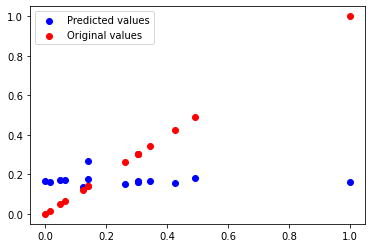

In [39]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
print("TD Graph")
mlpRegressor(X_train,y_train,X_test,y_test)

CDR Graph
R-Squared Value: -0.1733124776552255
Root Mean Squared Error: 0.2730996195799929


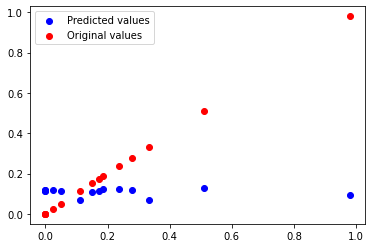

In [40]:
print("CDR Graph")
mlpRegressor(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [41]:
#split data into train and test data

y = df.iloc[:,5]
ycdr = df.iloc[:,4]
df=df.drop("TD",axis=1)
df=df.drop("CDR",axis=1)
X = df.iloc[:,:]
Xcdr = df.iloc[:,:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 53)
Xcdr_train, Xcdr_test, ycdr_train, ycdr_test = train_test_split(Xcdr, ycdr, test_size = 0.3,random_state = 53)

TD Graph
R-Squared Value: -0.003633279100097919
Root Mean Squared Error: 0.24518585195724793


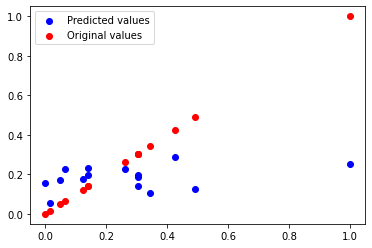

In [42]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
print("TD Graph")
linearRegression(X_train,y_train,X_test,y_test)

CDR Graph
R-Squared Value: -2.009141591295799
Root Mean Squared Error: 0.43735647669844635


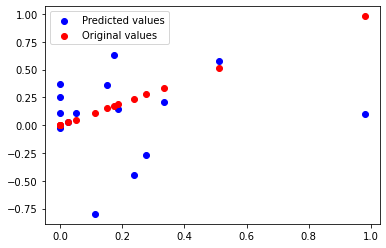

In [43]:
print("CDR Graph")
linearRegression(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)

Rbf-TD Graph
R-Squared Value: -0.09720921648004155
Root Mean Squared Error: 0.25636138138174125


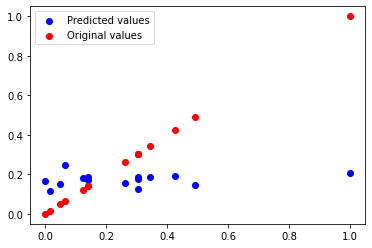

In [44]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
svr=SVR(kernel = 'rbf')
print("Rbf-TD Graph")
svrRegression(X_train,y_train,X_test,y_test)

Rbf-CDR Graph
R-Squared Value: -0.23945919966775864
Root Mean Squared Error: 0.2806922153718834


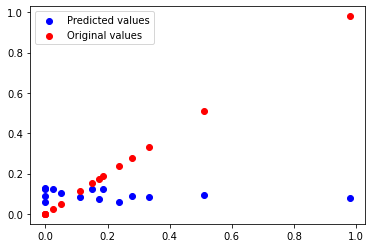

In [45]:
print("Rbf-CDR Graph")
svr=SVR(kernel = 'rbf')
svrRegression(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)

Linear-TD Graph
R-Squared Value: -0.09720921648004155
Root Mean Squared Error: 0.25636138138174125


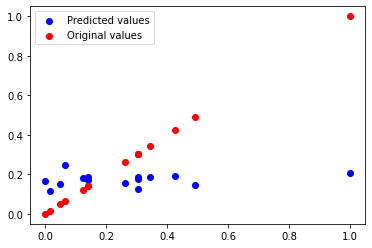

In [46]:
print("Linear-TD Graph")
svr=SVR(kernel = 'linear')
svrRegression(X_train,y_train,X_test,y_test)

Linear-CDR Graph
R-Squared Value: -0.23945919966775864
Root Mean Squared Error: 0.2806922153718834


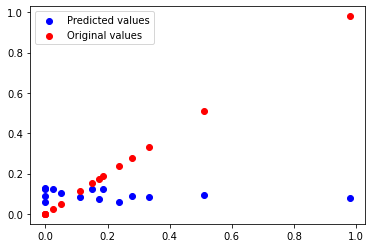

In [47]:
print("Linear-CDR Graph")
svr=SVR(kernel = 'linear')
svrRegression(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)

TD Graph
R-Squared Value: -0.2556706581453083
Root Mean Squared Error: 0.2742494419820825


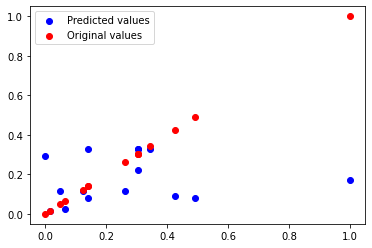

In [48]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
print("TD Graph")
decisionTreeRegression(X_train,y_train,X_test,y_test)

CDR Graph
R-Squared Value: -0.05417378556625985
Root Mean Squared Error: 0.25886322456148736


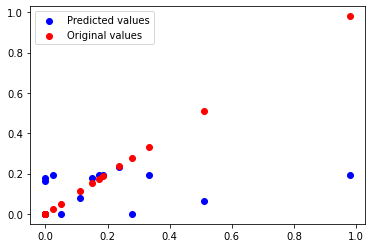

In [49]:
print("CDR Graph")
decisionTreeRegression(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)

TD Graph
R-Squared Value: 0.05362640457840229
Root Mean Squared Error: 0.23808892103315416


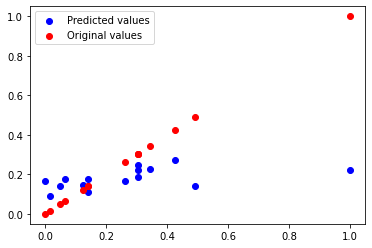

In [50]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
print("TD Graph")
randomDecTreeRegression(X_train,y_train,X_test,y_test)

CDR Graph
R-Squared Value: 0.01479470371704672
Root Mean Squared Error: 0.2502520360002964


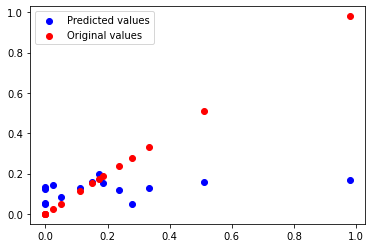

In [51]:
print("CDR Graph")
randomDecTreeRegression(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)

TD Graph
R-Squared Value: -0.09356621979107316
Root Mean Squared Error: 0.25593543701691623


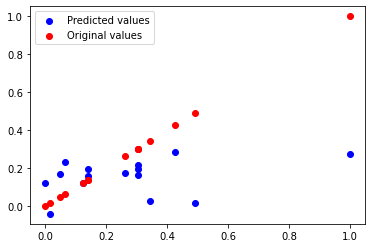

In [52]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
print("TD Graph")
mlpRegressor(X_train,y_train,X_test,y_test)

CDR Graph
R-Squared Value: -0.4772927050595701
Root Mean Squared Error: 0.3064414630972095


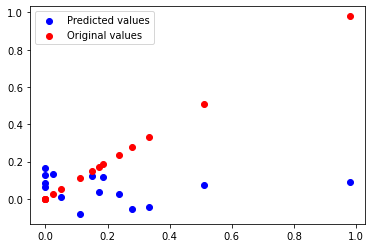

In [53]:
print("CDR Graph")
mlpRegressor(Xcdr_train,ycdr_train,Xcdr_test,ycdr_test)